In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error


In [2]:
CENTRE = 13000
STD    = 10000
NUM_SAMPLES = 400_000

# Target

count    400000.000000
mean      13911.979178
std        8711.783925
min           0.072821
25%        6918.267224
50%       13104.716649
75%       19765.625120
max       58707.587728
dtype: float64


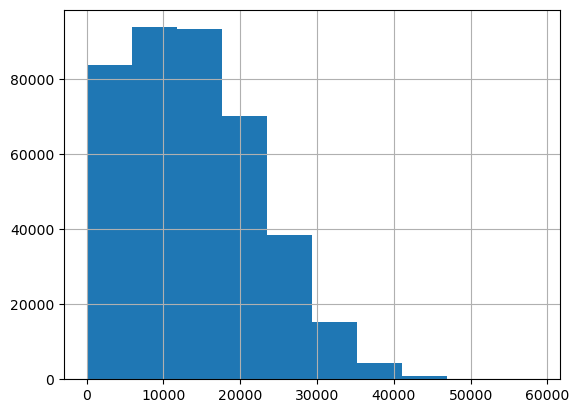

In [3]:
target = pd.Series(np.abs(np.random.normal(CENTRE, STD, NUM_SAMPLES))) # generate positive values
print(target.describe())
target.hist();

# Predict median

In [4]:
preds = pd.Series([target.median()]*target.shape[0])
preds.describe().round(1)

count    400000.0
mean      13104.7
std           0.0
min       13104.7
25%       13104.7
50%       13104.7
75%       13104.7
max       13104.7
dtype: float64

# MAPE test

In [5]:
def test(NUM_TO_EDIT):

    _target = target.copy()
    
    print('\nBefore:')
    print('Values <10 count', _target[_target<10].count())
    print('Values <10 fraction', round(_target[_target<10].count()/_target.shape[0]*100, 3), '%')
    
    MAPE_test = []
    for i in range(1,10):
        # edit first value in target dataset
        _target.iloc[:NUM_TO_EDIT] = i
        MAPE_test += [mean_absolute_percentage_error(_target, preds)]

    print('\nAfter:')
    print('Values <10 count', _target[_target<10].count())
    print('Values <10 fraction', round(_target[_target<10].count()/_target.shape[0]*100, 3), '%\n')

    MAPE_test = pd.Series(MAPE_test, index=range(1,10))  
    MAPE_test.plot()
    plt.xlabel('Edited value of first target')
    plt.ylabel('MAPE')
    plt.show()
    
    print(MAPE_test.describe().round(3))
    print('\nRatio MAPE max/min', round(MAPE_test.max()/MAPE_test.min(), 3),
          '\nfor NUM_TO_EDIT =', NUM_TO_EDIT,
          '\nit\'s', round(NUM_TO_EDIT/NUM_SAMPLES*100, 3), '% of total samples count'
         )



Before:
Values <10 count 148
Values <10 fraction 0.037 %

After:
Values <10 count 4145
Values <10 fraction 1.036 %



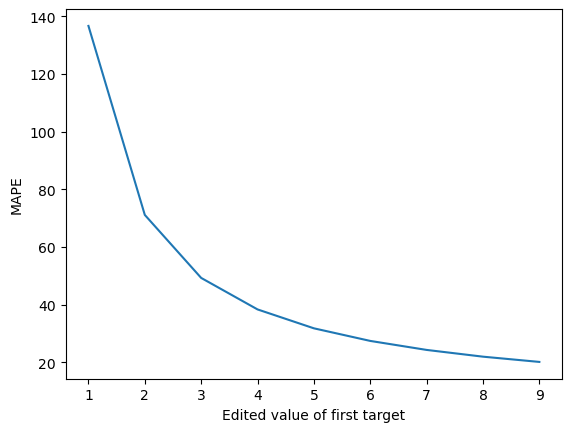

count      9.000
mean      46.783
std       37.370
min       20.152
25%       24.312
50%       31.801
75%       49.274
max      136.638
dtype: float64

Ratio MAPE max/min 6.78 
for NUM_TO_EDIT = 4000 
it's 1.0 % of total samples count


In [6]:
test(4000)